In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
os.chdir("D:\Stroke-Prediction")

In [4]:
os.listdir()

['healthcare-dataset-stroke-data.csv']

In [5]:
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [6]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
print("Average BMI is:{}".format(round(dataset['bmi'].mean(),2)))

Average BMI is:28.89


In [9]:
dataset['bmi'] = dataset['bmi'].fillna(round(dataset['bmi'].mean(),1))

In [10]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


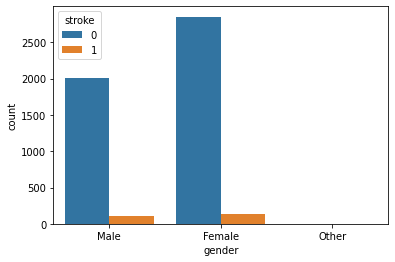

In [11]:
sns.countplot(x=dataset['gender'],hue=dataset['stroke'])
plt.show()

In [12]:
dataset['age'] = dataset['age'].astype("int64")

In [13]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


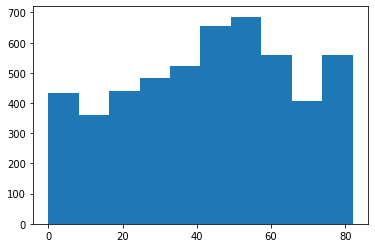

In [14]:
plt.hist(x=dataset['age'])
plt.show()

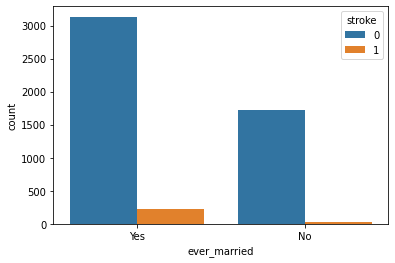

In [15]:
sns.countplot(x=dataset['ever_married'],
              hue=dataset['stroke'])
plt.show()

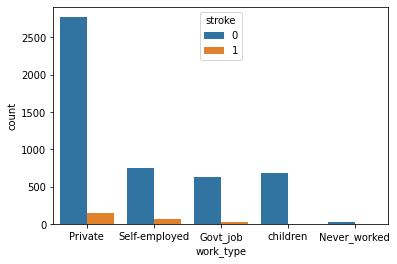

In [16]:
sns.countplot(x=dataset['work_type'],
              hue=dataset['stroke'])
plt.show()

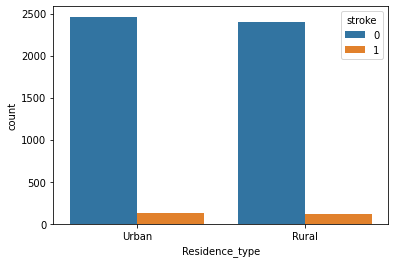

In [17]:
sns.countplot(x=dataset['Residence_type'],
              hue=dataset['stroke'])
plt.show()

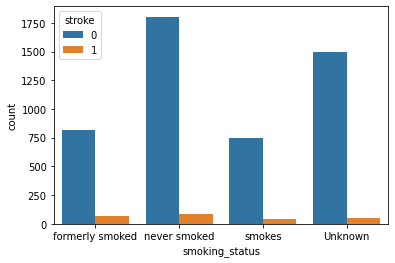

In [18]:
sns.countplot(x=dataset['smoking_status'],
              hue=dataset['stroke'])
plt.show()

In [19]:
print("Number of rows is:{}".format(dataset.shape[0]))
print("Number of column is:{}".format(dataset.shape[1]))

Number of rows is:5110
Number of column is:12


In [20]:
dataset['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [21]:
x = dataset
y = dataset['stroke']

In [22]:
print(x.shape)
print(y.shape)

(5110, 12)
(5110,)


In [23]:
stroke_count_0,stroke_count_1 = dataset['stroke'].value_counts()

In [24]:
print(stroke_count_0)
print(stroke_count_1)

4861
249


In [25]:
stroke_0 = dataset[dataset['stroke']==0]
stroke_1 = dataset[dataset['stroke']==1]

In [26]:
print(stroke_0.shape)
print(stroke_1.shape)

(4861, 12)
(249, 12)


In [27]:
stroke_1_over = stroke_1.sample(stroke_count_0,replace=True)

In [28]:
test_over = pd.concat([stroke_1_over,stroke_0],axis=0)

<AxesSubplot:title={'center':'count(stroke)'}>

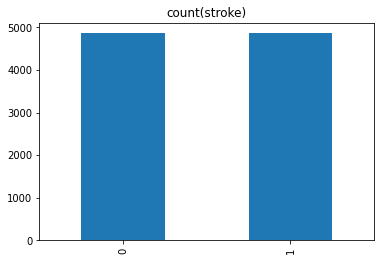

In [29]:
test_over['stroke'].value_counts().plot(kind='bar',title='count(stroke)')

In [30]:
test_over.shape

(9722, 12)

In [31]:
test_over['stroke'].value_counts()

0    4861
1    4861
Name: stroke, dtype: int64

In [32]:
test_over.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
190,24905,Female,65,0,0,Yes,Private,Urban,205.77,46.0,formerly smoked,1
155,24669,Female,77,0,1,Yes,Private,Rural,231.56,36.9,never smoked,1
171,60739,Female,79,1,1,No,Self-employed,Rural,60.94,28.9,never smoked,1
135,71279,Female,71,0,0,Yes,Govt_job,Urban,263.32,38.7,never smoked,1
7,10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1


In [33]:
test_over['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [34]:
def gender_encoder(x):
    if x=='Female':
        return 0
    elif x=='Male':
        return 1
    else:
        return 2

In [35]:
test_over['gender'] = test_over['gender'].apply(gender_encoder)

In [36]:
test_over.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
190,24905,0,65,0,0,Yes,Private,Urban,205.77,46.0,formerly smoked,1
155,24669,0,77,0,1,Yes,Private,Rural,231.56,36.9,never smoked,1


In [37]:
test_over['gender'].unique()

array([0, 1, 2], dtype=int64)

In [38]:
test_over['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [39]:
test_over['ever_married'] = test_over['ever_married'].apply(lambda x: 0 if x=='No'else 1)

In [40]:
test_over['ever_married'].unique()

array([1, 0], dtype=int64)

In [41]:
test_over['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [42]:
def work_encoder(x):
    if x=='Private':
        return 0
    elif x=='Self-employed':
        return 1
    elif x=='Govt_job':
        return 2
    elif x=='children':
        return 3
    else:
        return 4

In [43]:
test_over['work_type'] = test_over['work_type'].apply(work_encoder)

In [44]:
test_over['work_type'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [45]:
test_over.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
190,24905,0,65,0,0,1,0,Urban,205.77,46.0,formerly smoked,1
155,24669,0,77,0,1,1,0,Rural,231.56,36.9,never smoked,1


In [46]:
test_over['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [47]:
test_over['Residence_type'] = test_over['Residence_type'].apply(lambda x: 0 if x=='Urban'else 1)

In [48]:
test_over['Residence_type'].unique()

array([0, 1], dtype=int64)

In [49]:
test_over['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'Unknown', 'smokes'],
      dtype=object)

In [50]:
def smoke_encoder(x):
    if x=='smokes':
        return 0
    elif x=='formerly smoked':
        return 1
    elif x=='never smoked':
        return 2
    else:
        return 3

In [51]:
test_over['smoking_status'] = test_over['smoking_status'].apply(smoke_encoder)

In [52]:
test_over['smoking_status'].unique()

array([1, 2, 3, 0], dtype=int64)

In [53]:
test_over.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
190,24905,0,65,0,0,1,0,0,205.77,46.0,1,1
155,24669,0,77,0,1,1,0,1,231.56,36.9,2,1
171,60739,0,79,1,1,0,1,1,60.94,28.9,2,1
135,71279,0,71,0,0,1,2,0,263.32,38.7,2,1
7,10434,0,69,0,0,0,0,0,94.39,22.8,2,1


In [54]:
test_over.to_csv("Stroke-cleaned-preprocessed-data.csv",index=False)